In [1]:
import pandas as pd 
import os
import requests
import matplotlib.pyplot as plt 
import numpy as np

In [2]:

lat =49.083333
lon = -122.35
response = requests.get(f"https://archive-api.open-meteo.com/v1/archive?latitude={lat}&longitude={lon}&start_date=2010-01-01&end_date=2023-01-01&hourly=temperature_2m,relativehumidity_2m,precipitation,cloudcover&timezone=auto")

# hourly data only 
# response = requests.get("https://archive-api.open-meteo.com/v1/archive?latitude=49.083333&longitude=-122.35&start_date=2010-01-01&end_date=2023-01-01&hourly=temperature_2m,relativehumidity_2m,precipitation,cloudcover&timezone=auto")
data = response.json()


In [3]:
df_hourly = pd.DataFrame(data["hourly"])
df_hourly["time"] = pd.to_datetime(df_hourly["time"])
df_hourly.set_index("time", inplace=True)

In [4]:

# resample to daily
df_daily = df_hourly.resample('D').agg({'temperature_2m': np.mean, 'relativehumidity_2m': np.mean, 'precipitation': np.sum, 'cloudcover': np.mean})

In [5]:
df_daily.head()

,temperature_2m,relativehumidity_2m,precipitation,cloudcover
time,,,,
2010-01-01,2.900000,99.333333,29.2,93.916667
2010-01-02,3.020833,99.791667,16.1,92.833333
2010-01-03,3.341667,89.666667,2.1,92.958333
2010-01-04,3.287500,99.375000,15.3,100.000000
2010-01-05,3.908333,79.500000,0.5,76.375000


In [6]:
yearly = df_daily.groupby(df_daily.index.dayofyear).mean()

In [7]:
yearly.head()

,temperature_2m,relativehumidity_2m,precipitation,cloudcover
time,,,,
1,0.138095,79.535714,4.292857,57.750000
2,0.332051,81.669872,9.930769,60.650641
3,0.635256,85.096154,9.661538,55.615385
4,0.924679,88.637821,10.692308,74.596154
5,1.340705,87.201923,9.823077,76.743590


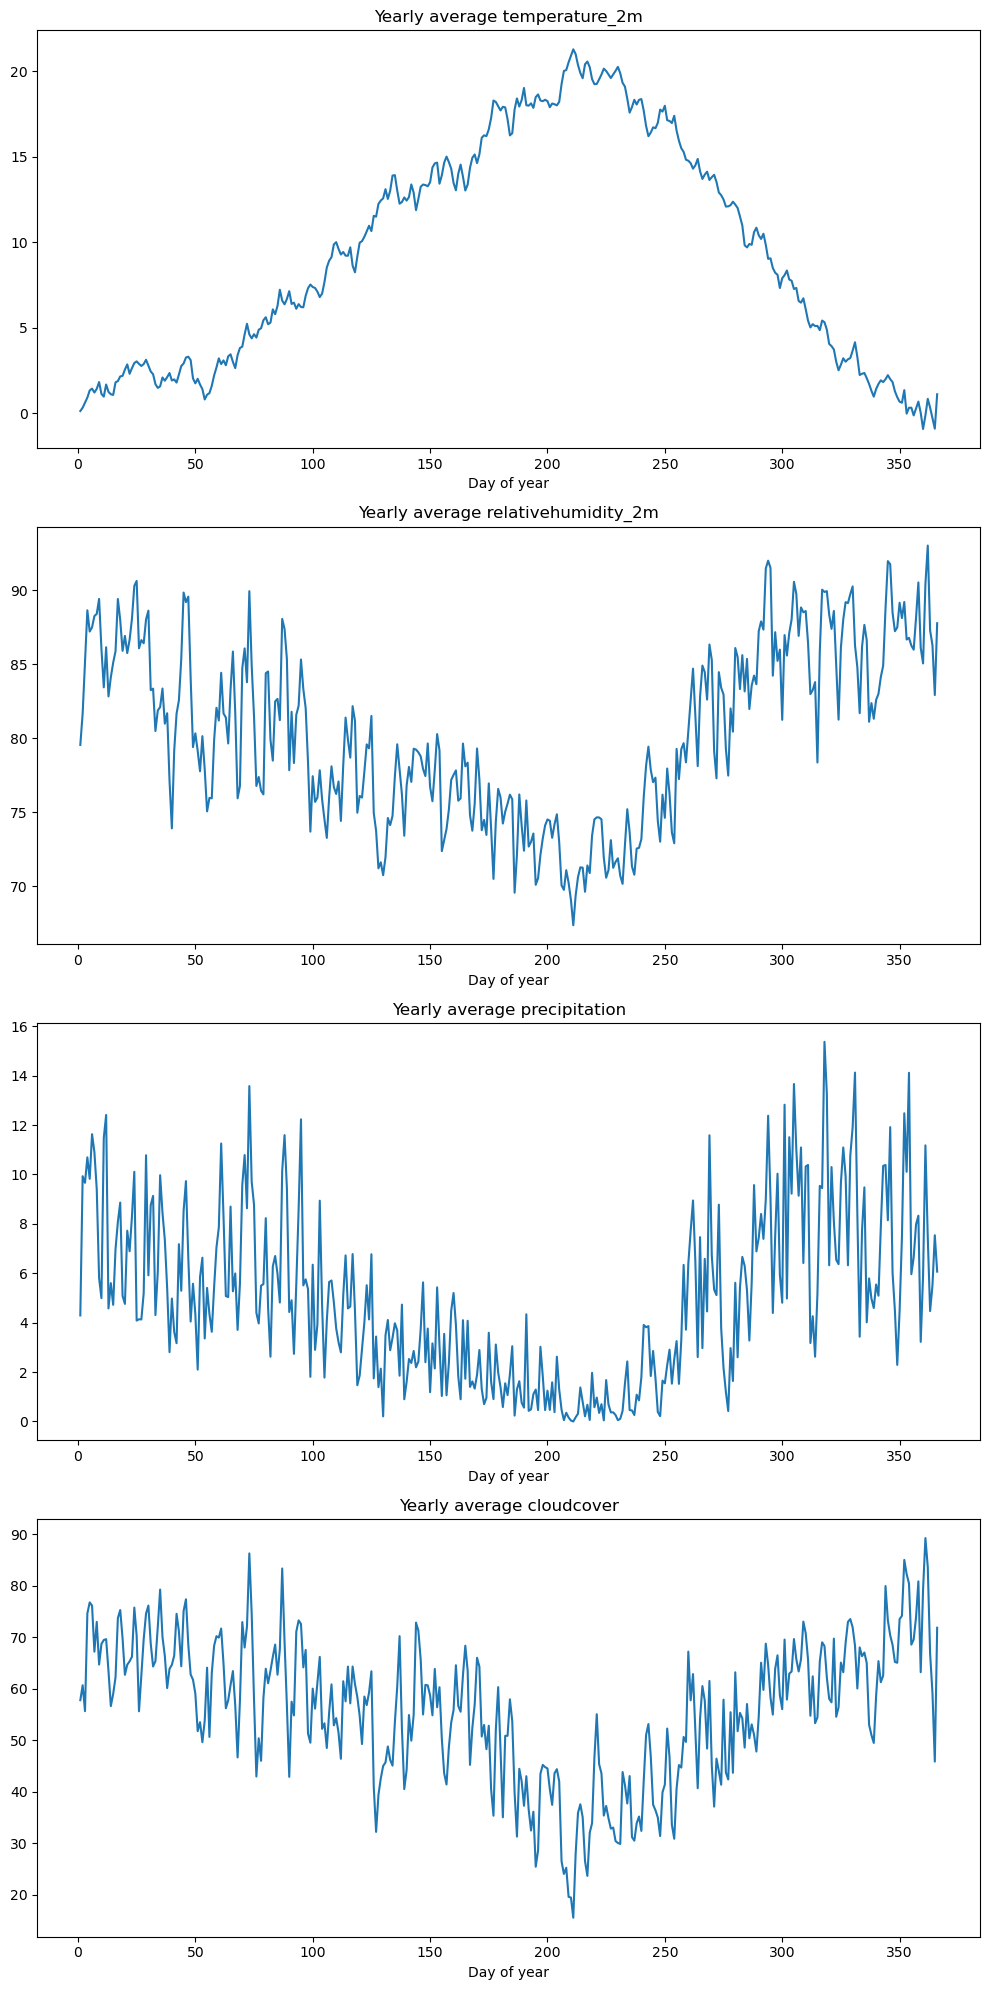

In [10]:
fig, axs = plt.subplots(len(yearly.columns), 1, figsize=(10, 20))

for i, col in enumerate(yearly.columns):
    axs[i].plot(yearly.index, yearly[col])
    axs[i].set_title('Yearly average ' + col)
    axs[i].set_xlabel('Day of year')

plt.tight_layout()
plt.show()

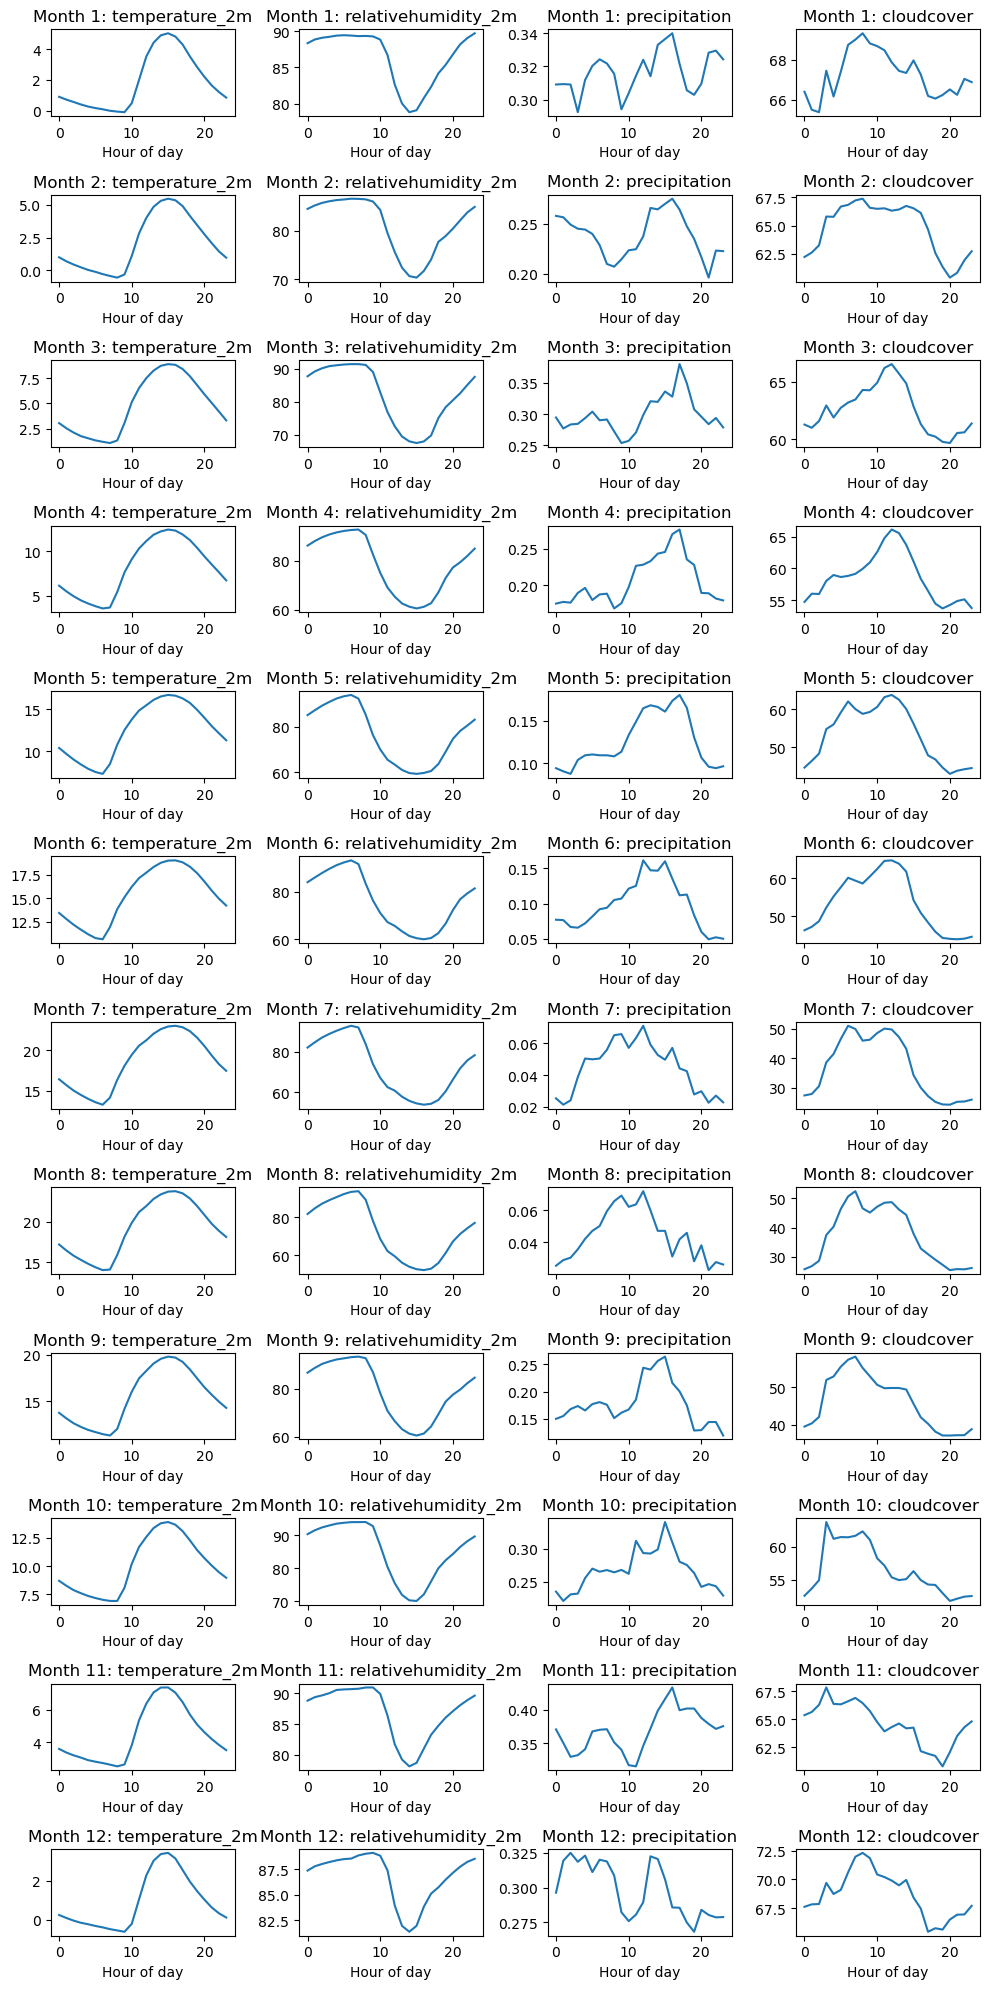

In [16]:
# average day for each month
df_avg_day_hourly = df_hourly.groupby([df_hourly.index.month, df_hourly.index.hour]).mean()

# Now you can loop over the months and plot the average day for each month
fig, axs = plt.subplots(12, 4, figsize=(10, 20))
for month in range(1, 13):
    

    df_sub = df_avg_day_hourly.loc[month]

    for i, col in enumerate(df_hourly.columns):
        axs[month-1][i%4].plot(df_sub.index, df_sub[col])
        axs[month-1][i%4].set_title(f'Month {month}: {col}')
        axs[month-1][i%4].set_xlabel('Hour of day')

plt.tight_layout()
plt.show()

In [20]:
df_avg_day_hourly.index.names = ['month', 'hour']
df_avg_day_hourly.head(50)

temperature_2m  relativehumidity_2m  precipitation  cloudcover
month hour                                                                
1     0           0.904703            88.346535       0.309158   66.396040
      1           0.723515            88.861386       0.309406   65.490099
      2           0.568564            89.101485       0.309158   65.366337
      3           0.408168            89.232673       0.292574   67.452970
      4           0.272030            89.396040       0.311881   66.155941
      5           0.174752            89.452970       0.320297   67.405941
      6           0.095792            89.405941       0.324257   68.754950
      7          -0.000495            89.326733       0.321782   69.017327
      8          -0.054208            89.353960       0.315594   69.336634
      9          -0.093069            89.289604       0.294307   68.826733
      10          0.490099            88.849010       0.303960   68.690594
      11          1.995792            86.717822       0.314356   68.482673
      12          3.518812            82.621287       0.324010   67.876238
      13          4.417822            79.995050       0.314109   67.445545
      14          4.895297            78.799505       0.332921   67.341584
      15          5.027970            79.074257       0.336386   67.972772
      16          4.816089            80.759901       0.339851   67.262376
      17          4.297030            82.304455       0.321535   66.183168
      18          3.526733            84.170792       0.305693   66.049505
      19          2.830446            85.356436       0.302970   66.232673
      20          2.198762            86.794554       0.309653   66.512376
      21          1.645050            88.195545       0.328218   66.240099
      22          1.213366            89.066832       0.329455   67.042079
      23          0.853713            89.720297       0.324257   66.881188
2     0           1.004360            84.474114       0.257766   62.234332
      1           0.698638            85.188011       0.256403   62.621253
      2           0.451499            85.708447       0.249046   63.261580
      3           0.240054            86.054496       0.244959   65.792916
      4           0.038147            86.288828       0.244142   65.771117
      5          -0.106267            86.416894       0.239782   66.673025
      6          -0.277929            86.577657       0.228610   66.822888
      7          -0.420708            86.539510       0.209809   67.212534
      8          -0.546594            86.441417       0.207084   67.365123
      9          -0.308174            85.994550       0.214441   66.564033
      10          1.100272            84.267030       0.223433   66.474114
      11          2.824796            79.482289       0.224523   66.517711
      12          4.011717            75.574932       0.237330   66.310627
      13          4.856131            72.346049       0.265668   66.414169
      14          5.313896            70.607629       0.264305   66.730245
      15          5.476022            70.297003       0.269755   66.520436
      16          5.358038            71.667575       0.274932   66.114441
      17          4.911989            74.035422       0.264033   64.656676
      18          4.162943            77.675749       0.247411   62.588556
      19          3.455586            78.874659       0.234877   61.367847
      20          2.758583            80.400545       0.216621   60.416894
      21          2.083651            82.119891       0.196185   60.839237
      22          1.450136            83.760218       0.223161   61.942779
      23          0.973297            84.893733       0.222616   62.735695
3     0           3.061538            87.769231       0.294541   61.260546
      1           2.554342            89.245658       0.276923   60.982630

In [ ]:
# climate data categorical
# NOT free api limited to 20 calls per day

# import requests

# url = "https://koppen-climate-classification.p.rapidapi.com/classification"

# querystring = {"lat":"49.078078","lon":"-122.3508038"}

# headers = {
# 	"X-RapidAPI-Key": "02af329317msh0462d9135f248fbp198b4bjsn5eebb00426cb",
# 	"X-RapidAPI-Host": "koppen-climate-classification.p.rapidapi.com"
# }

# response = requests.get(url, headers=headers, params=querystring)

# print(response.json())

{'resource': 'koppen', 'location': {'latitude': '49.25', 'longitude': '-122.25'}, 'classification': 'Cfb'}


In [ ]:
response.json()["classification"]

climate_data = {}

climate_data["49.25;-122.25"] = response.json()["classification"]

'Cfb'